<a href="https://colab.research.google.com/github/190ibrahim/MLFFs_Transition_Metal_Complexes_BSc_Thesis/blob/main/Model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

results_Ni_compounds_path = '/content/drive/MyDrive/Thesis/Thesis/data/results_Ni_compounds.csv'

Mounted at /content/drive


In [7]:
# Dataframe initialization
results_Ni_compounds_df = None

# Load CSV Data
try:
  results_Ni_compounds_df = pd.read_csv(results_Ni_compounds_path)
  print("Ni compounds data loaded successfully!")
except (FileNotFoundError, pd.errors.ParserError) as e:
  print(f"Error loading Ni compounds data: {e}")


Ni compounds data loaded successfully!


In [8]:
# Summary of information on the dataset.
results_Ni_compounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CSD_code            8702 non-null   object 
 1   HL_Gap              8702 non-null   float64
 2   smallest_distance1  8702 non-null   float64
 3   smallest_distance2  8702 non-null   float64
 4   smallest_distance3  8702 non-null   float64
 5   smallest_distance4  8702 non-null   float64
 6   largest_coulomb1    8702 non-null   float64
 7   largest_coulomb2    8702 non-null   float64
 8   largest_coulomb3    8702 non-null   float64
 9   largest_coulomb4    8702 non-null   float64
dtypes: float64(9), object(1)
memory usage: 680.0+ KB


In [9]:
# Summary of information on the dataset.
results_Ni_compounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CSD_code            8702 non-null   object 
 1   HL_Gap              8702 non-null   float64
 2   smallest_distance1  8702 non-null   float64
 3   smallest_distance2  8702 non-null   float64
 4   smallest_distance3  8702 non-null   float64
 5   smallest_distance4  8702 non-null   float64
 6   largest_coulomb1    8702 non-null   float64
 7   largest_coulomb2    8702 non-null   float64
 8   largest_coulomb3    8702 non-null   float64
 9   largest_coulomb4    8702 non-null   float64
dtypes: float64(9), object(1)
memory usage: 680.0+ KB


In [10]:
print(f'Number of rows/examples and columns in the dataset: {results_Ni_compounds_df.shape}')

Number of rows/examples and columns in the dataset: (8702, 10)


In [11]:
# Checking NA values in columns:
print("Display NA values in each column: ")
results_Ni_compounds_df.isna().sum(axis=0)

Display NA values in each column: 


CSD_code              0
HL_Gap                0
smallest_distance1    0
smallest_distance2    0
smallest_distance3    0
smallest_distance4    0
largest_coulomb1      0
largest_coulomb2      0
largest_coulomb3      0
largest_coulomb4      0
dtype: int64

In [12]:
# Checking NA values in rows:
print("Display NA values in each row: ")
results_Ni_compounds_df.isna().sum(axis=1)

Display NA values in each row: 


0       0
1       0
2       0
3       0
4       0
       ..
8697    0
8698    0
8699    0
8700    0
8701    0
Length: 8702, dtype: int64

In [13]:
# Checking NULL values in columns:
print("Display NULL values in each column: ")
results_Ni_compounds_df.isnull().sum()

Display NULL values in each column: 


CSD_code              0
HL_Gap                0
smallest_distance1    0
smallest_distance2    0
smallest_distance3    0
smallest_distance4    0
largest_coulomb1      0
largest_coulomb2      0
largest_coulomb3      0
largest_coulomb4      0
dtype: int64

In [14]:
print("Display NULL values in each row: ")
results_Ni_compounds_df.isnull().sum(1)

Display NULL values in each row: 


0       0
1       0
2       0
3       0
4       0
       ..
8697    0
8698    0
8699    0
8700    0
8701    0
Length: 8702, dtype: int64

In [15]:
# Display all columns
results_Ni_compounds_df.columns

Index(['CSD_code', 'HL_Gap', 'smallest_distance1', 'smallest_distance2',
       'smallest_distance3', 'smallest_distance4', 'largest_coulomb1',
       'largest_coulomb2', 'largest_coulomb3', 'largest_coulomb4'],
      dtype='object')

# Features

In [16]:
largest_coulomb_cols = [col for col in results_Ni_compounds_df.columns if col.startswith('largest_coulomb')]
smallest_distance_cols = [col for col in results_Ni_compounds_df.columns if col.startswith('smallest_distance')]


In [17]:
results_Ni_compounds_df.drop(columns=smallest_distance_cols, inplace=True)


In [18]:
features = results_Ni_compounds_df[largest_coulomb_cols]
print("Features ==>\n", features.columns)

Features ==>
 Index(['largest_coulomb1', 'largest_coulomb2', 'largest_coulomb3',
       'largest_coulomb4'],
      dtype='object')


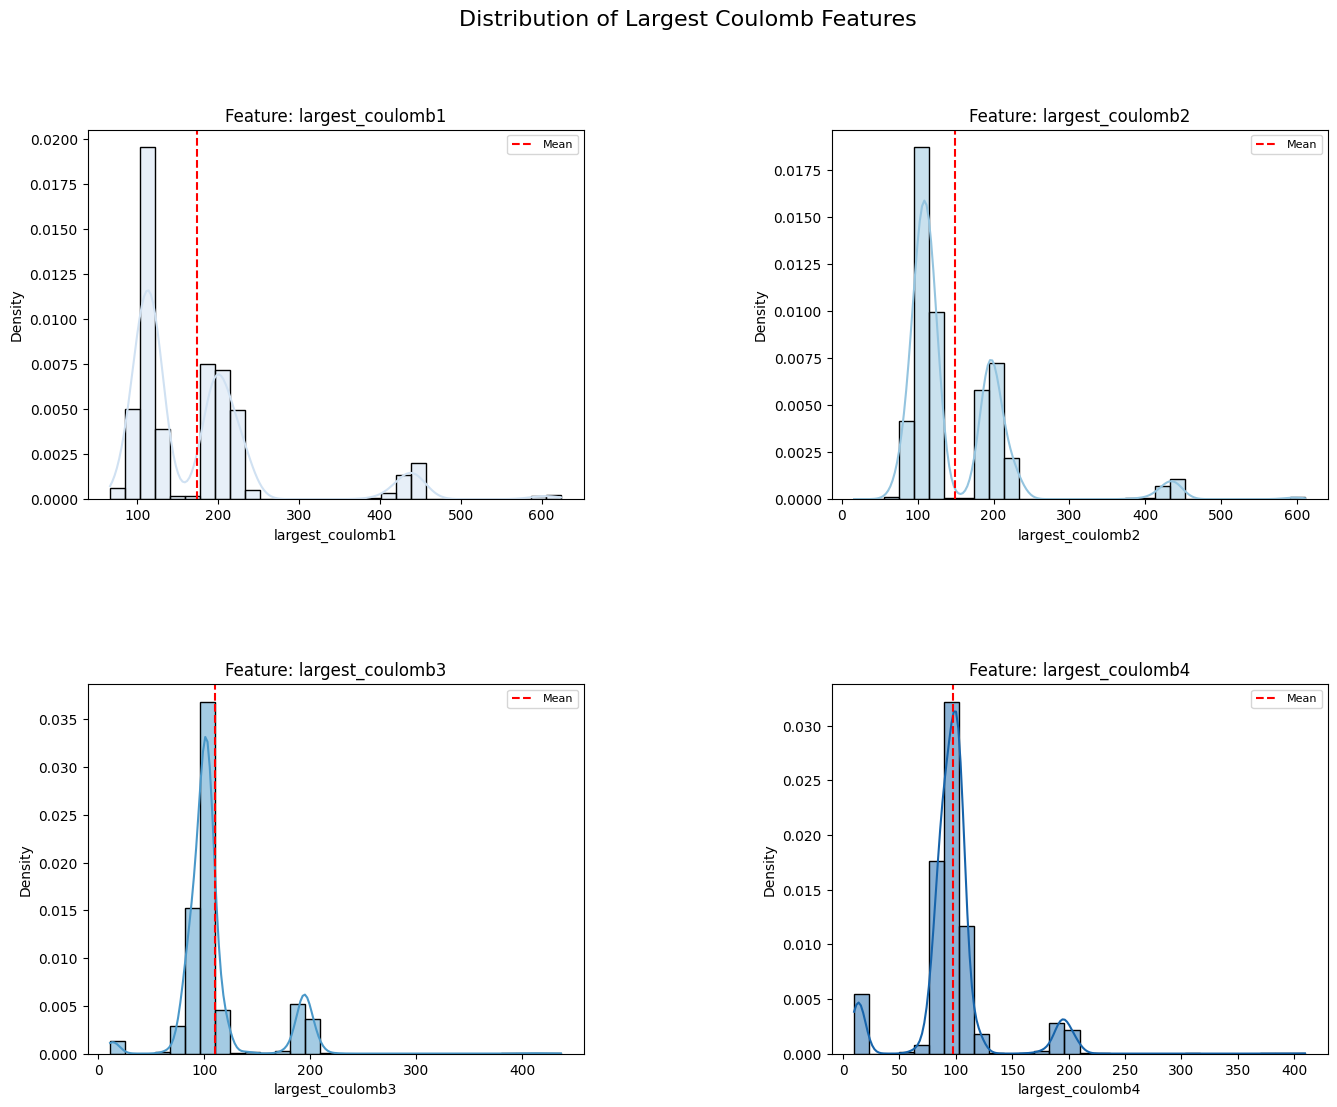

In [19]:


# Create a color palette
palette = sns.color_palette("Blues", n_colors=4)

# Calculate number of rows and columns
n_cols = 2
n_rows = len(features.columns) // n_cols + (len(features.columns) % n_cols > 0)

# Create the figure and axis objects
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 12))
fig.suptitle("Distribution of Largest Coulomb Features", fontsize=16)

# Iterate over features and plot histograms
for i, column in enumerate(features.columns):
    row, col = i // n_cols, i % n_cols
    ax = axes[row, col]
    sns.histplot(data=results_Ni_compounds_df, x=column, kde=True, color=palette[i], ax=ax, stat="density", bins=30)
    ax.axvline(results_Ni_compounds_df[column].mean(), color='r', linestyle='--', label='Mean')
    ax.set_title(f"Feature: {column}", fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel("Density", fontsize=10)
    ax.legend(fontsize=8)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

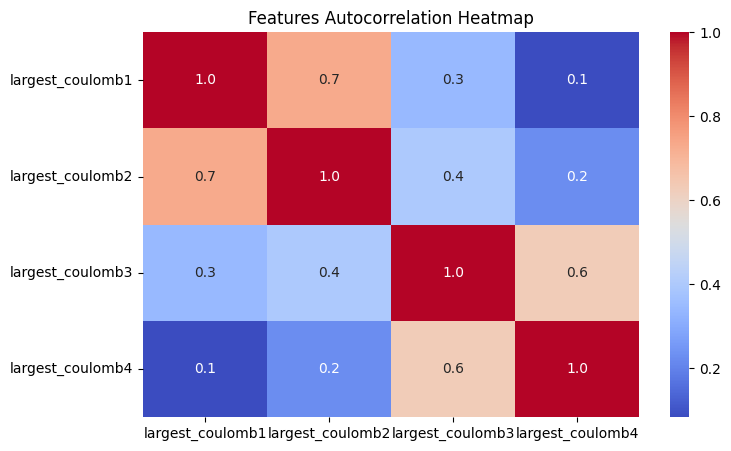

In [20]:
plt.figure(figsize = (8,5))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, cbar = True, annot = True, fmt=".1f", cmap='coolwarm')
plt.title('Features Autocorrelation Heatmap')
plt.show()

# Target variable

In [21]:
target = results_Ni_compounds_df['HL_Gap']
target.head()

0    0.05942
1    0.11195
2    0.04748
3    0.14632
4    0.14839
Name: HL_Gap, dtype: float64

In [22]:
# Display statistical summary of target variable
print(target.describe())

count    8702.000000
mean        0.081759
std         0.029837
min         0.002600
25%         0.057290
50%         0.083930
75%         0.102422
max         0.183090
Name: HL_Gap, dtype: float64


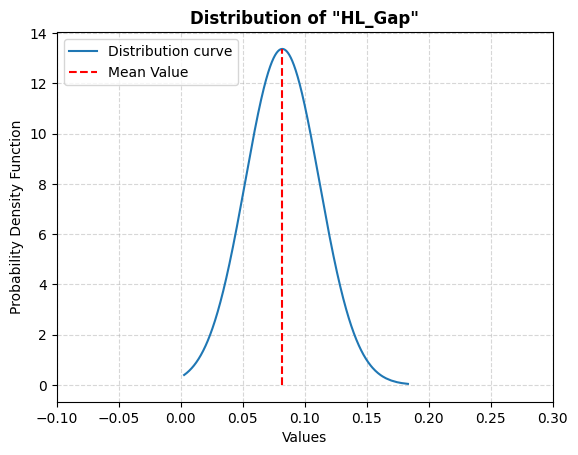

In [23]:
def plot_target_distribution(dataframe: pd.DataFrame):

    # Target name
    target_name = 'HL_Gap'

    # Extract the values for the target
    values = dataframe[target_name].sort_values().values

    # Calculate mean and standard deviation for the molecule charge
    mean = values.mean()
    std = values.std()

    pdf = scipy.stats.norm.pdf(values, loc=mean, scale=std)

    plt.plot(values, pdf , label="Distribution curve")
    plt.title(f'Distribution of "{target_name}"', weight='bold')
    plt.xlabel('Values')
    plt.ylabel('Probability Density Function')
    plt.xlim([-0.1,0.3])
    plt.grid(True, alpha=0.5, linestyle="--")

  # single line
    plt.vlines(x = mean, ymin = 0, ymax = max(pdf),
            colors = 'red',
            label = 'Mean Value',
            linestyles='dashed')
    plt.legend(loc="upper left")
    plt.show()

plot_target_distribution(dataframe=results_Ni_compounds_df)

In [24]:
RANDOM_SEED = 42
shuffled_dataset = results_Ni_compounds_df

shuffled_dataset = shuffled_dataset.sample(frac=1,random_state=RANDOM_SEED)

In [25]:
shuffled_dataset.shape

(8702, 6)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
shuffled_dataset.iloc[:,2:] = scaler.fit_transform(shuffled_dataset.iloc[:,2:].values)

In [28]:
shuffled_dataset.describe()

,HL_Gap,largest_coulomb1,largest_coulomb2,largest_coulomb3,largest_coulomb4
count,8702.000000,8.702000e+03,8.702000e+03,8.702000e+03,8.702000e+03
mean,0.081759,1.755535e-16,1.241123e-16,-3.102807e-17,2.234225e-16
std,0.029837,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,0.002600,-1.136925e+00,-1.774379e+00,-2.631968e+00,-2.417735e+00
25%,0.057290,-6.795970e-01,-5.885204e-01,-4.244653e-01,-2.536843e-01
50%,0.083930,-5.384286e-01,-4.127414e-01,-2.305513e-01,2.203497e-02
75%,0.102422,3.134557e-01,5.846984e-01,-1.045997e-01,1.668544e-01
max,0.183090,4.753387e+00,6.145791e+00,8.638855e+00,8.656847e+00


In [29]:
shuffled_dataset.head(10)

,CSD_code,HL_Gap,largest_coulomb1,largest_coulomb2,largest_coulomb3,largest_coulomb4
7234,VIKLEH,0.09997,0.508733,0.963732,-0.090859,0.272418
7198,VEYMIV,0.06798,-0.826892,-0.755611,-1.162839,-0.874189
4803,OBEZIG,0.07664,0.297002,-0.412683,-0.135561,0.192358
6057,RUZYAM,0.03456,0.242889,0.636113,2.136329,2.608600
1076,DAHXER,0.12201,2.812484,0.549178,2.110939,-0.214319
8047,XUGVUS,0.06274,-0.581108,-0.402202,-0.279052,0.083975
2673,HOTXAP,0.10562,0.592186,0.686270,2.342809,2.711409
6401,SUPXIL,0.08427,-0.519086,-0.603136,-0.279243,0.028290
3826,LETLEE,0.10680,0.244288,-0.505188,-0.070753,-0.306452
5123,PARKOJ,0.07736,2.267926,3.187617,-2.570224,-2.310881


In [30]:
features = shuffled_dataset.drop(['CSD_code', 'HL_Gap'], axis=1)
label = shuffled_dataset[['HL_Gap']]

In [31]:
x_train, x_temp, y_train, y_temp = train_test_split(features, label, train_size=0.80, random_state=42)

In [32]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
print("Training Features Shape:", x_train.shape)
print("Training Labels Shape:", y_train.shape)

print("Validation Features Shape:", x_val.shape)
print("Validation Labels Shape:", y_val.shape)

print("Test Features Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (6961, 4)
Training Labels Shape: (6961, 1)
Validation Features Shape: (870, 4)
Validation Labels Shape: (870, 1)
Test Features Shape: (871, 4)
Test Labels Shape: (871, 1)


In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [36]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-_70f6thw
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-_70f6thw
  Resolved https://github.com/tensorflow/docs to commit be897e71ee8795aa8725c5efb9f9ac626304243b
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.5.3.6908-py3-none-any.whl size=182514 sha256=b1f38ea59bac468f0b78a537f72b189b1cd150a717aa70772c56b86cbae35904
  Stored in directory: /tmp/pip-ephem-wheel-cache-eq5m775u/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [37]:
import pathlib

# First Model

In [38]:
first_model = keras.Sequential()

#Input Layer
first_model.add(Dense(32, activation='relu', input_shape=(4,)))
# Subsequent hidden layers
first_model.add(Dropout(0.3))

first_model.add(Dense(64, activation='relu'))
# Output layer
first_model.add(Dense(1))

# Compile the model
first_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae','mse']
)

print('Here is a summary of this model: ')
first_model.summary()

# Train the model
history = first_model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=0
)


Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
y_pred = first_model.predict(x_test)
results_df = pd.DataFrame({'true_target': y_test.values.flatten(), 'prediction': y_pred.flatten()})
results_df.head()

28/28 [==============================] - 0s 2ms/step


,true_target,prediction
0,0.05343,0.066948
1,0.13136,0.119853
2,0.10822,0.073963
3,0.08269,0.075076
4,0.06219,0.076656


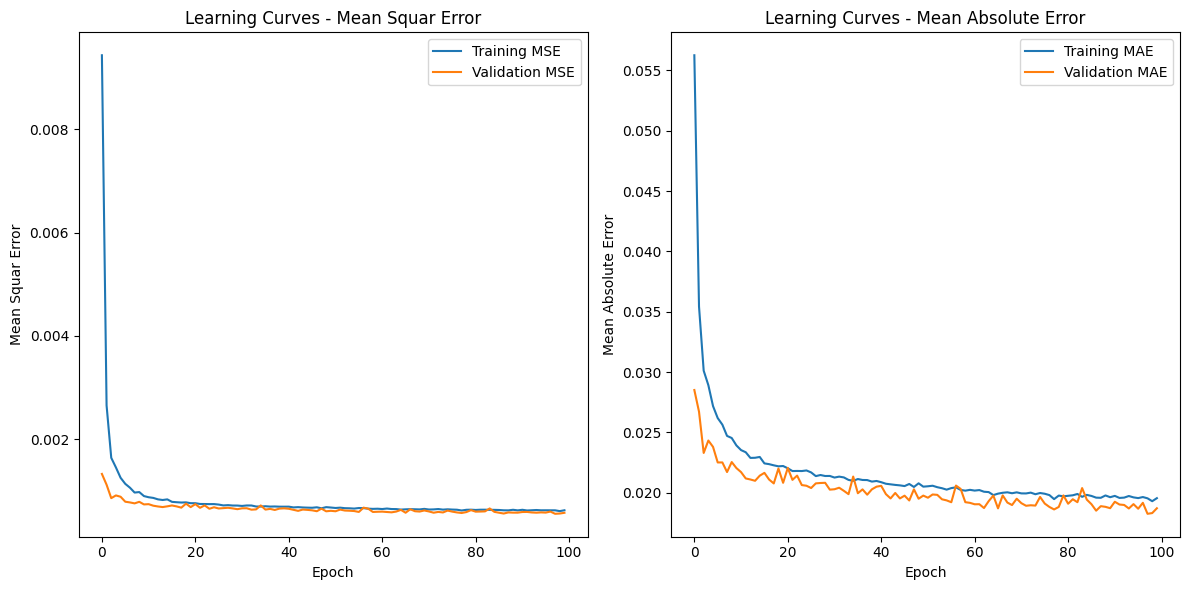

In [40]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Learning Curves - Mean Squar Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squar Error')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Learning Curves - Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [41]:
print('Error Rate on Train Split: ')
loss, mae, mse = first_model.evaluate(x_train, y_train, verbose=2)

print("Train set Mean Absolute Error  : {:.8f}".format(mae))
print("Train set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Train Split: 
218/218 - 0s - loss: 5.6866e-04 - mae: 0.0186 - mse: 5.6866e-04 - 291ms/epoch - 1ms/step
Train set Mean Absolute Error  : 0.01860116
Train set Mean Squared Error: 0.00056866


In [42]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = first_model.evaluate(x_val, y_val, verbose=2)

print("Validation set Mean Absolute Error  : {:.8f}".format(mae))
print("Validation set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 5.7304e-04 - mae: 0.0187 - mse: 5.7304e-04 - 54ms/epoch - 2ms/step
Validation set Mean Absolute Error  : 0.01870464
Validation set Mean Squared Error: 0.00057304


In [43]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = first_model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Absolute Error    : {:.8f}".format(mae))
print("Testing set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 5.6438e-04 - mae: 0.0185 - mse: 5.6438e-04 - 53ms/epoch - 2ms/step
Testing set Mean Absolute Error    : 0.01849383
Testing set Mean Squared Error: 0.00056438


In [44]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE')

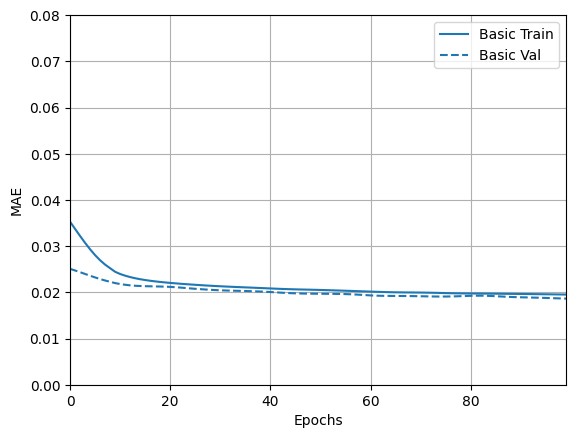

In [45]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.08])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

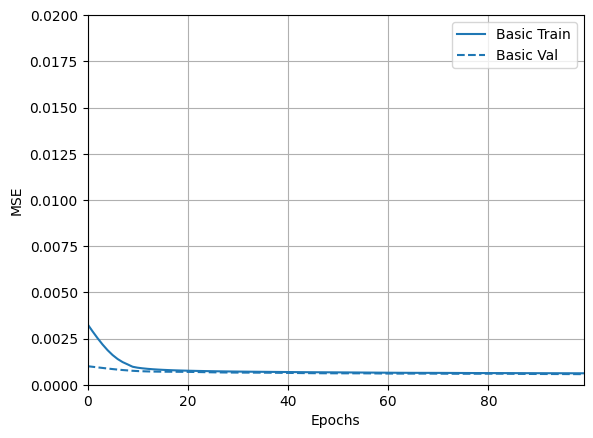

In [46]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.02])
plt.ylabel('MSE')

# Second Model

In [47]:
# Define the model architecture
second_model = Sequential([
    Dense(128, activation='relu', input_shape=(4,)),
    Dropout(0.2),
    Dense(265, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
second_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae', 'mse']
)




In [48]:
EPOCHS = 500
batch_size = 34 # 34, 38, 76, 95

print('Here is a summary of this model: ')
second_model.summary()

history = second_model.fit(
        x_train,
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        steps_per_epoch = x_train.shape[0] // batch_size,
        validation_data = (x_val, y_val),
        callbacks=[tfdocs.modeling.EpochDots()]
        )

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               640       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 265)               34185     
                                                                 
 dropout_2 (Dropout)         (None, 265)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 266       
                                                                 
Total params: 35091 (137.07 KB)
Trainable params: 35091 (137.07 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________

In [49]:
y_pred = second_model.predict(x_test)
results_df = pd.DataFrame({'true_target': y_test.values.flatten(), 'prediction': y_pred.flatten()})
results_df.head()

28/28 [==============================] - 0s 1ms/step


,true_target,prediction
0,0.05343,0.079888
1,0.13136,0.118519
2,0.10822,0.079498
3,0.08269,0.077469
4,0.06219,0.082727


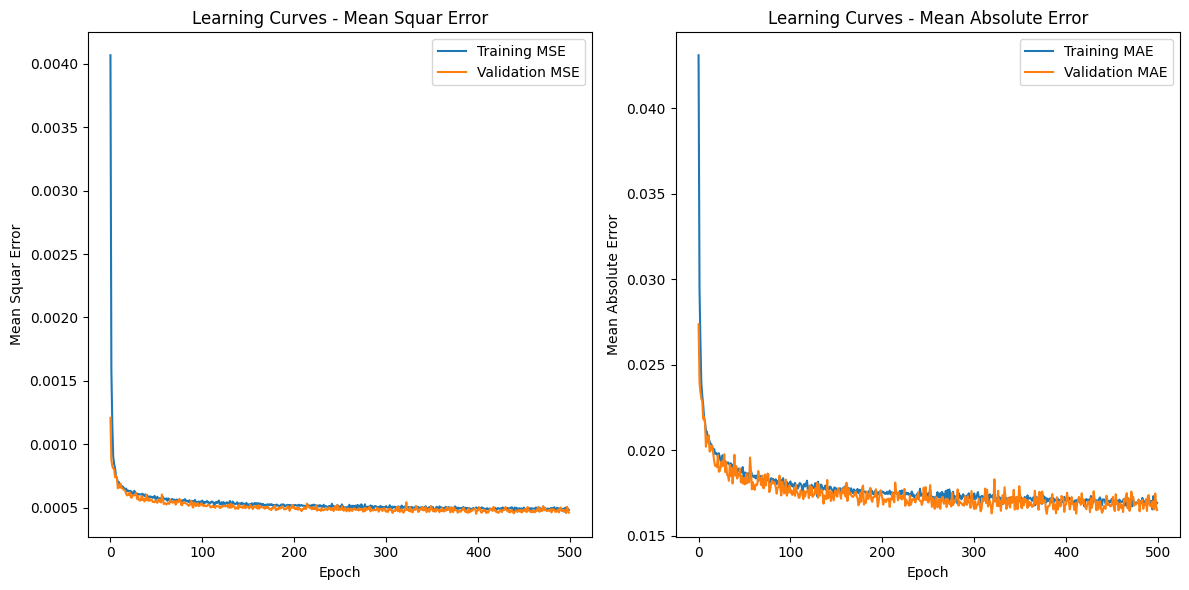

In [50]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))  # Divide height by 2 for side-by-side plots

plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Learning Curves - Mean Squar Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squar Error')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Learning Curves - Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [51]:
print('Error Rate on Train Split: ')
loss, mae, mse = second_model.evaluate(x_train, y_train, verbose=2)

print("Train set Mean Absolute Error  : {:.8f}".format(mae))
print("Train set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Train Split: 
218/218 - 0s - loss: 4.3875e-04 - mae: 0.0160 - mse: 4.3875e-04 - 311ms/epoch - 1ms/step
Train set Mean Absolute Error  : 0.01597630
Train set Mean Squared Error: 0.00043875


In [52]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = second_model.evaluate(x_val, y_val, verbose=2)

print("Validation set Mean Absolute Error  : {:.8f}".format(mae))
print("Validation set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 4.6143e-04 - mae: 0.0165 - mse: 4.6143e-04 - 59ms/epoch - 2ms/step
Validation set Mean Absolute Error  : 0.01650704
Validation set Mean Squared Error: 0.00046143


In [53]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = second_model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Absolute Error    : {:.8f}".format(mae))
print("Testing set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 4.6900e-04 - mae: 0.0166 - mse: 4.6900e-04 - 57ms/epoch - 2ms/step
Testing set Mean Absolute Error    : 0.01660690
Testing set Mean Squared Error: 0.00046900


In [54]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(40)

Summary of the results after each epoch: 


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
460,0.000494,0.017002,0.000494,0.000466,0.016621,0.000466,460
461,0.000493,0.016978,0.000493,0.000474,0.016805,0.000474,461
462,0.000493,0.017061,0.000493,0.000464,0.016391,0.000464,462
463,0.000502,0.017167,0.000502,0.000478,0.017136,0.000478,463
464,0.000478,0.016775,0.000478,0.000478,0.016992,0.000478,464
465,0.000502,0.017111,0.000502,0.000496,0.017274,0.000496,465
466,0.000476,0.016749,0.000476,0.000505,0.017494,0.000505,466
467,0.000501,0.017215,0.000501,0.000467,0.016609,0.000467,467
468,0.000494,0.017039,0.000494,0.000492,0.017191,0.000492,468
469,0.000487,0.016877,0.000487,0.000474,0.016461,0.000474,469


In [55]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['mae']
train_mse = history.history['mse']
val_mse = history.history['mse']

In [56]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE')

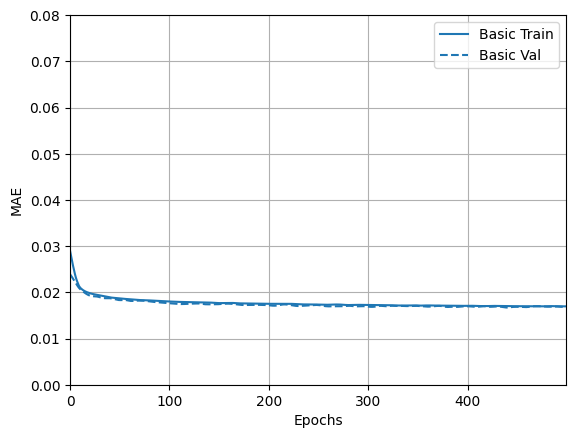

In [57]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.08])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

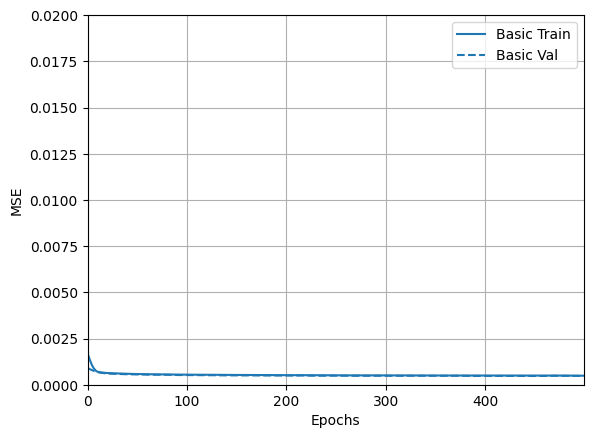

In [58]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.02])
plt.ylabel('MSE')

# Third Model

In [59]:
def build_neural_network_model():

    model = Sequential([
        # Input layer
        Input(shape=(x_train.shape[1], )),

        # hidden layer 1
        Dense(64, activation='relu', kernel_initializer='he_uniform'),

        # hidden layer 1
        Dense(64, activation='relu', kernel_initializer='he_uniform'),

        # hidden Layer 3
        Dense(128, activation='relu', kernel_initializer='he_uniform'),

        # hidden layer 4
        Dense(128,  activation='relu',kernel_initializer='he_uniform'),
        # output layer
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

    return model
third_model = build_neural_network_model()
# model = build_neural_network_model()
print('Here is a summary of this model: ')
third_model.summary()



Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 29441 (115.00 KB)
Trainable params: 29441 (115.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________

In [60]:
EPOCHS = 500
batch_size = 34 # 34, 38, 76, 95


history = third_model.fit(
        x_train,
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        steps_per_epoch = x_train.shape[0] // batch_size,
        validation_data = (x_val, y_val),
        callbacks=[tfdocs.modeling.EpochDots()]
        )


Epoch: 0, loss:0.1953,  mae:0.1906,  mse:0.1953,  val_loss:0.0120,  val_mae:0.0658,  val_mse:0.0120,  
....................................................................................................
Epoch: 100, loss:0.0007,  mae:0.0193,  mse:0.0007,  val_loss:0.0008,  val_mae:0.0198,  val_mse:0.0008,  
....................................................................................................
Epoch: 200, loss:0.0007,  mae:0.0192,  mse:0.0007,  val_loss:0.0007,  val_mae:0.0193,  val_mse:0.0007,  
....................................................................................................
Epoch: 300, loss:0.0005,  mae:0.0171,  mse:0.0005,  val_loss:0.0007,  val_mae:0.0194,  val_mse:0.0007,  
....................................................................................................
Epoch: 400, loss:0.0005,  mae:0.0165,  mse:0.0005,  val_loss:0.0005,  val_mae:0.0172,  val_mse:0.0005,  
........................................................................

In [61]:
y_pred = third_model.predict(x_test)
results_df = pd.DataFrame({'true_target': y_test.values.flatten(), 'prediction': y_pred.flatten()})
results_df.head()

28/28 [==============================] - 0s 1ms/step


,true_target,prediction
0,0.05343,0.065623
1,0.13136,0.127902
2,0.10822,0.098870
3,0.08269,0.076438
4,0.06219,0.082554


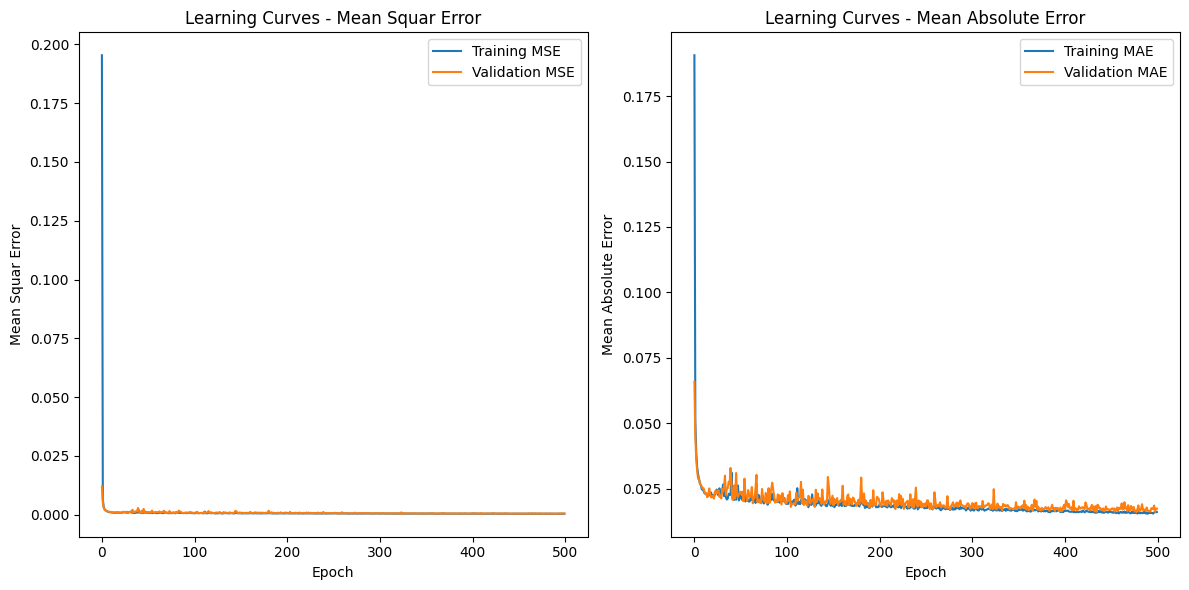

In [62]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Learning Curves - Mean Squar Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squar Error')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Learning Curves - Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [63]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(40)

Summary of the results after each epoch: 


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
460,0.000454,0.016050,0.000454,0.000519,0.017309,0.000519,460
461,0.000441,0.015756,0.000441,0.000635,0.019291,0.000635,461
462,0.000450,0.015929,0.000450,0.000501,0.016977,0.000501,462
463,0.000443,0.015760,0.000443,0.000516,0.017113,0.000516,463
464,0.000468,0.016209,0.000468,0.000674,0.019778,0.000674,464
465,0.000433,0.015668,0.000433,0.000532,0.017405,0.000532,465
466,0.000453,0.015994,0.000453,0.000556,0.017806,0.000556,466
467,0.000443,0.015763,0.000443,0.000490,0.016433,0.000490,467
468,0.000475,0.016286,0.000475,0.000627,0.018635,0.000627,468
469,0.000446,0.015864,0.000446,0.000469,0.016529,0.000469,469


In [64]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE')

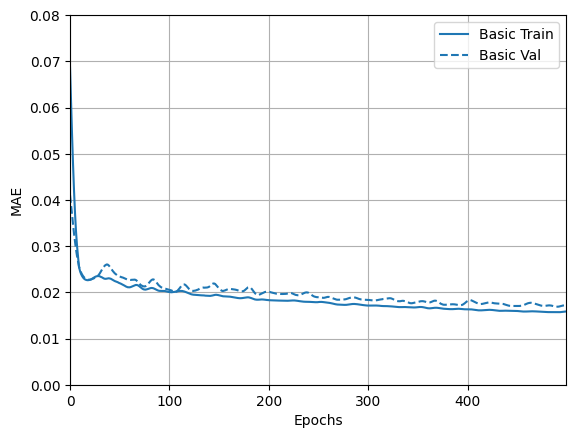

In [65]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.08])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

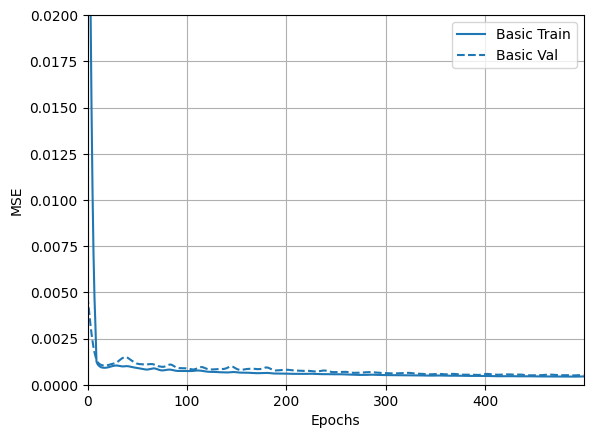

In [66]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.02])
plt.ylabel('MSE')

In [67]:
print('Error Rate on Train Split: ')
loss, mae, mse = third_model.evaluate(x_train, y_train, verbose=2)

print("Train set Mean Abs Error    : {:.8f}".format(mae))
print("Train set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Train Split: 
218/218 - 0s - loss: 4.2746e-04 - mae: 0.0158 - mse: 4.2746e-04 - 301ms/epoch - 1ms/step
Train set Mean Abs Error    : 0.01578560
Train set Mean Squared Error: 0.00042746


In [68]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = third_model.evaluate(x_val, y_val, verbose=2)

print("Validation set Mean Abs Error    : {:.8f}".format(mae))
print("Validation set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 5.3923e-04 - mae: 0.0173 - mse: 5.3923e-04 - 59ms/epoch - 2ms/step
Validation set Mean Abs Error    : 0.01732616
Validation set Mean Squared Error: 0.00053923


In [69]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = third_model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error    : {:.8f}".format(mae))
print("Testing set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 5.2736e-04 - mae: 0.0178 - mse: 5.2736e-04 - 56ms/epoch - 2ms/step
Testing set Mean Abs Error    : 0.01779661
Testing set Mean Squared Error: 0.00052736


# Hyperparameters tuning

In [70]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [71]:
from keras_tuner import BayesianOptimization
from kerastuner import Objective

<ipython-input-71-d76a110d5a4c>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import Objective


In [72]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()

    # Tunable: Number of dense layers
    num_layers = hp.Int('num_layers', min_value=2, max_value=8, step=1)

    # Input layer
    model.add(layers.Dense(units=4, activation='relu', input_shape=(4,)))

    # Hidden layers
    for i in range(num_layers):
        # Tunable: Units per layer
        units = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32)
        # Tunable: Activation function
        activation = hp.Choice(f'activation_{i}', values=['relu', 'swish', 'tanh'])
        model.add(layers.Dense(units=units, activation=activation))

    # Output layer
    model.add(layers.Dense(units=1))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

# Instantiate the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=2,
    directory='bayesian_opt',
    project_name='regression_model_tuning'
)

# Perform hyperparameter search
tuner.search(
    x_train, y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Build and evaluate the best model
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
eval_result = best_model.evaluate(x_test, y_test)
print(f'Test MAE: {eval_result[1]}, Test MSE: {eval_result[2]}')

Trial 10 Complete [00h 03m 26s]
val_mse: 0.0006096614524722099

Best val_mse So Far: 0.0005416485073510557
Total elapsed time: 00h 25m 46s
Epoch 1/100
218/218 [==============================] - 3s 4ms/step - loss: 0.0012 - mae: 0.0258 - mse: 0.0012 - val_loss: 7.6367e-04 - val_mae: 0.0226 - val_mse: 7.6367e-04
Epoch 2/100
218/218 [==============================] - 1s 4ms/step - loss: 8.0825e-04 - mae: 0.0232 - mse: 8.0825e-04 - val_loss: 7.5020e-04 - val_mae: 0.0221 - val_mse: 7.5020e-04
Epoch 3/100
218/218 [==============================] - 1s 4ms/step - loss: 7.8018e-04 - mae: 0.0227 - mse: 7.8018e-04 - val_loss: 9.3400e-04 - val_mae: 0.0236 - val_mse: 9.3400e-04
Epoch 4/100
218/218 [==============================] - 1s 4ms/step - loss: 7.7909e-04 - mae: 0.0226 - mse: 7.7909e-04 - val_loss: 7.6477e-04 - val_mae: 0.0225 - val_mse: 7.6477e-04
Epoch 5/100
218/218 [==============================] - 1s 4ms/step - loss: 7.5411e-04 - mae: 0.0222 - mse: 7.5411e-04 - val_loss: 7.8464e-04 - va

In [73]:
def build_model(hp):
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
    ])

    # Hyperparameter: Number of dense layers
    for i in range(hp.Int('num_layers', 2, 5)):  # Tuning the number of layers between 2 and 4
        model.add(Dense(
            units=hp.Int('units_' + str(i), min_value=64, max_value=265, step=16),
            activation=hp.Choice('activation_' + str(i), [
                'relu',
                'leaky_relu',
                'swish',
                'tanh',
            ]),
            kernel_initializer='he_uniform'
        ))

    model.add(Dense(1))

    # Hyperparameter: Learning rate choices
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='mse',
                  metrics=['mae', 'mse'])

    return model

In [74]:
tuner = BayesianOptimization(
    build_model,
    objective='val_mse',
    num_initial_points=20,
    max_trials=10,
    directory='model_directory',
    project_name='hyperparameters_tuning_features_2')

In [75]:
early_stopping_callback = EarlyStopping(monitor='val_mse', patience=15)

tuner.search(x_train,
             y_train,
             epochs=500,
             validation_data=(x_val, y_val),
             callbacks=[early_stopping_callback, tfdocs.modeling.EpochDots()])


Trial 10 Complete [00h 00m 36s]
val_mse: 0.0006064301123842597

Best val_mse So Far: 0.0005479900864884257
Total elapsed time: 00h 06m 24s


In [76]:
tuner.results_summary()

Results summary
Results in model_directory/hyperparameters_tuning_features_2
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 00 summary
Hyperparameters:
num_layers: 5
units_0: 224
activation_0: swish
units_1: 112
activation_1: tanh
learning_rate: 0.0001
units_2: 64
activation_2: relu
units_3: 64
activation_3: relu
units_4: 64
activation_4: relu
Score: 0.0005479900864884257

Trial 03 summary
Hyperparameters:
num_layers: 5
units_0: 192
activation_0: swish
units_1: 80
activation_1: relu
learning_rate: 0.0001
units_2: 96
activation_2: relu
units_3: 208
activation_3: relu
units_4: 176
activation_4: tanh
Score: 0.0005805652472190559

Trial 07 summary
Hyperparameters:
num_layers: 2
units_0: 96
activation_0: relu
units_1: 96
activation_1: leaky_relu
learning_rate: 0.01
units_2: 160
activation_2: tanh
units_3: 256
activation_3: relu
units_4: 176
activation_4: leaky_relu
Score: 0.0005959486588835716

Trial 09 summary
Hyperparameters:
num_layers: 3
units_0: 176
activation

In [77]:
# Define the file path for saving the best model
checkpoint_path = "./model/best_model_features_2.keras"

# ModelCheckpoint callback to save the best model
ckpt_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_mse',
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the entire model
    verbose=0
)

In [78]:
# Extract the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
pd.DataFrame(best_hps.values,index=[0])

,num_layers,units_0,activation_0,units_1,activation_1,learning_rate,units_2,activation_2,units_3,activation_3,units_4,activation_4
0,5,224,swish,112,tanh,0.0001,64,relu,64,relu,64,relu


# Rebuild the model with the best hyperparameters

In [79]:
# Rebuild the model with the best hyperparameters
best_model_hp = tuner.hypermodel.build(best_hps)

# Train
history = best_model_hp.fit(
    x_train,
    y_train,
    batch_size=34,
    epochs=500,
    verbose=0,
    validation_data=(x_val, y_val),
    callbacks=[ckpt_callback, tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:0.0057,  mae:0.0445,  mse:0.0057,  val_loss:0.0015,  val_mae:0.0266,  val_mse:0.0015,  
....................................................................................................
Epoch: 100, loss:0.0005,  mae:0.0178,  mse:0.0005,  val_loss:0.0006,  val_mae:0.0188,  val_mse:0.0006,  
....................................................................................................
Epoch: 200, loss:0.0005,  mae:0.0168,  mse:0.0005,  val_loss:0.0005,  val_mae:0.0160,  val_mse:0.0005,  
....................................................................................................
Epoch: 300, loss:0.0004,  mae:0.0160,  mse:0.0004,  val_loss:0.0005,  val_mae:0.0158,  val_mse:0.0005,  
....................................................................................................
Epoch: 400, loss:0.0004,  mae:0.0153,  mse:0.0004,  val_loss:0.0005,  val_mae:0.0160,  val_mse:0.0005,  
........................................................................

In [80]:
best_model_hp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 224)               1120      
                                                                 
 dense_5 (Dense)             (None, 112)               25200     
                                                                 
 dense_6 (Dense)             (None, 64)                7232      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41937 (163.82 KB)
Trainable params: 4193

In [81]:
y_pred = best_model_hp.predict(x_test)
results_df = pd.DataFrame({'true_target': y_test.values.flatten(), 'prediction': y_pred.flatten()})
results_df.head()

28/28 [==============================] - 0s 2ms/step


,true_target,prediction
0,0.05343,0.075111
1,0.13136,0.121973
2,0.10822,0.100034
3,0.08269,0.077811
4,0.06219,0.075394


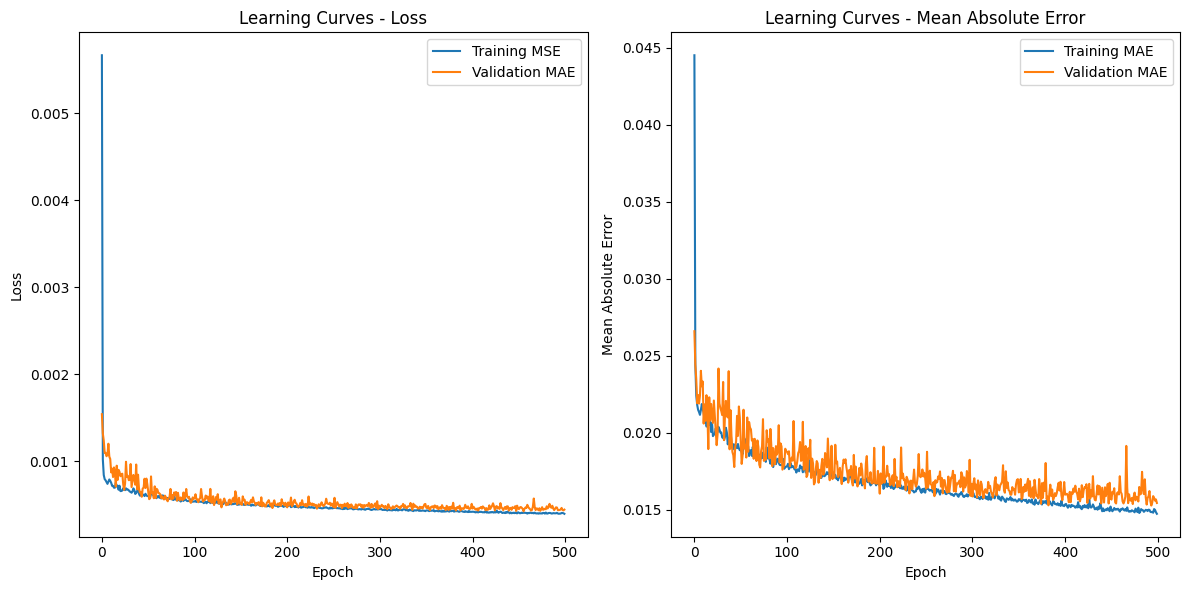

In [82]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MAE')
plt.title('Learning Curves - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Learning Curves - Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [83]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.000396,0.014795,0.000396,0.000442,0.015874,0.000442,495
496,0.000403,0.015033,0.000403,0.000460,0.015754,0.000460,496
497,0.000402,0.014979,0.000402,0.000438,0.015579,0.000438,497
498,0.000399,0.014828,0.000399,0.000432,0.015659,0.000432,498
499,0.000393,0.014726,0.000393,0.000441,0.015431,0.000441,499


Text(0, 0.5, 'MAE')

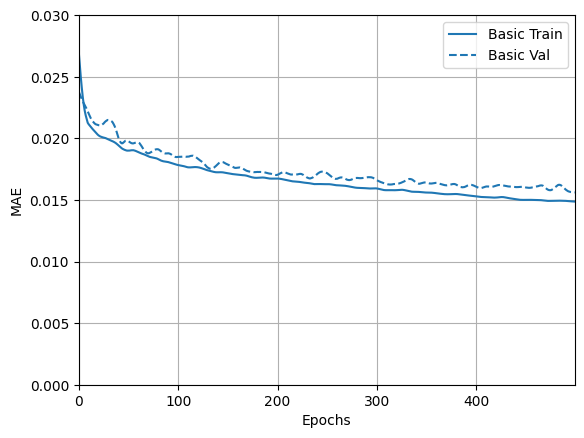

In [84]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.03])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

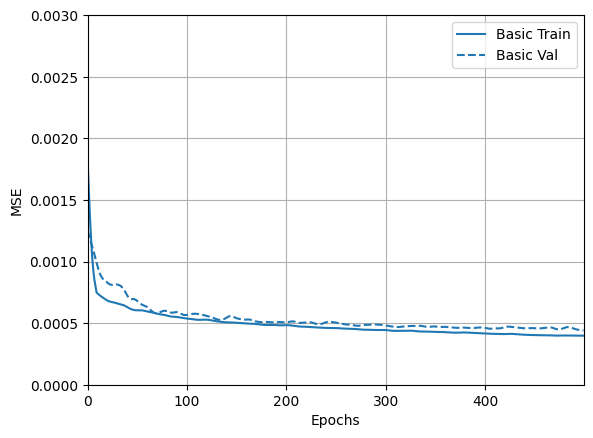

In [85]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.003])
plt.ylabel('MSE')

In [86]:
print('Error Rate on Train Split: ')
loss, mae, mse = best_model_hp.evaluate(x_train, y_train, verbose=2)

print("Train set Mean Abs Error    : {:.5f}".format(mae))
print("Train set Mean Squared Error: {:.5f}".format(mse))

Error Rate on Train Split: 
218/218 - 0s - loss: 3.6582e-04 - mae: 0.0142 - mse: 3.6582e-04 - 336ms/epoch - 2ms/step
Train set Mean Abs Error    : 0.01425
Train set Mean Squared Error: 0.00037


In [87]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = best_model_hp.evaluate(x_val, y_val, verbose=2)

print("Validation set Mean Abs Error    : {:.6f}".format(mae))
print("Validation set Mean Squared Error: {:.6f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 4.4104e-04 - mae: 0.0154 - mse: 4.4104e-04 - 61ms/epoch - 2ms/step
Validation set Mean Abs Error    : 0.015431
Validation set Mean Squared Error: 0.000441


In [88]:
print('Error Rate on Test Split: ')
loss, mae, mse = best_model_hp.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error    : {:.6f}".format(mae))
print("Testing set Mean Squared Error: {:.6f}".format(mse))

Error Rate on Test Split: 
28/28 - 0s - loss: 4.6481e-04 - mae: 0.0163 - mse: 4.6481e-04 - 59ms/epoch - 2ms/step
Testing set Mean Abs Error    : 0.016272
Testing set Mean Squared Error: 0.000465


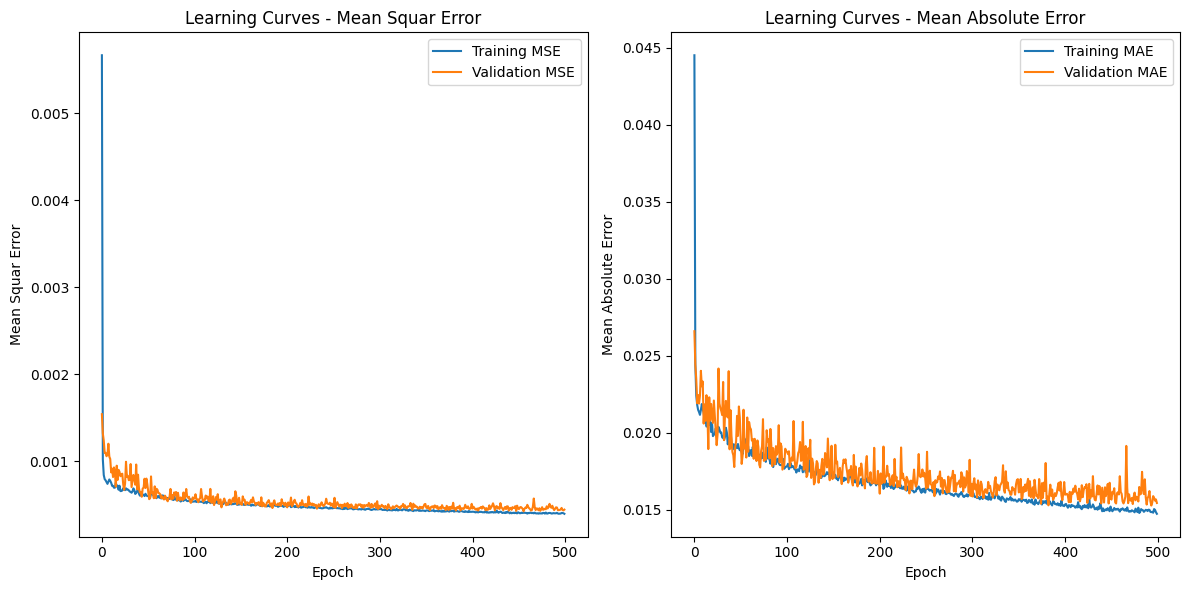

28/28 [==============================] - 0s 2ms/step


,true_target,prediction
0,0.05343,0.075111
1,0.13136,0.121973
2,0.10822,0.100034
3,0.08269,0.077811
4,0.06219,0.075394


In [89]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Learning Curves - Mean Squar Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squar Error')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Learning Curves - Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

y_pred = best_model_hp.predict(x_test)
results_df = pd.DataFrame({'true_target': y_test.values.flatten(), 'prediction': y_pred.flatten()})
results_df.head()

In [90]:
from tensorflow.keras.models import load_model

In [91]:
try:
    final_model = load_model(checkpoint_path)  # Load the complete model
    print("Model loaded successfully!")
    final_model.summary()  # Display the model's summary
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 224)               1120      
                                                                 
 dense_5 (Dense)             (None, 112)               25200     
                                                                 
 dense_6 (Dense)             (None, 64)                7232      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41937 (163.82

In [92]:
print('Error Rate on Train Split: ')
loss, mae, mse = final_model.evaluate(x_train, y_train, verbose=2)

print("Train set Mean Abs Error    : {:.5f}".format(mae))
print("Train set Mean Squared Error: {:.5f}".format(mse))

Error Rate on Train Split: 
218/218 - 1s - loss: 3.8769e-04 - mae: 0.0146 - mse: 3.8769e-04 - 563ms/epoch - 3ms/step
Train set Mean Abs Error    : 0.01465
Train set Mean Squared Error: 0.00039


In [93]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = final_model.evaluate(x_val, y_val, verbose=2)

print("Validation set Mean Abs Error    : {:.6f}".format(mae))
print("Validation set Mean Squared Error: {:.6f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 4.2177e-04 - mae: 0.0154 - mse: 4.2177e-04 - 63ms/epoch - 2ms/step
Validation set Mean Abs Error    : 0.015396
Validation set Mean Squared Error: 0.000422


In [94]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = final_model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error    : {:.6f}".format(mae))
print("Testing set Mean Squared Error: {:.6f}".format(mse))

Error Rate on Evaluation Split: 
28/28 - 0s - loss: 4.4797e-04 - mae: 0.0156 - mse: 4.4797e-04 - 64ms/epoch - 2ms/step
Testing set Mean Abs Error    : 0.015604
Testing set Mean Squared Error: 0.000448


In [95]:
# function to display predictions and actual values (true values)
def print_predictions(y_true, y_pred, count):

    prediction_df = y_true.copy()
    # DataFrame to display the actual and predicted values
    prediction_df['Y1_pred'] = y_pred[:, 0]

    # Display the predictions
    print("Predictions:")
    print(prediction_df.head(count).to_markdown(index=False))


In [96]:
predictions = best_model_hp.predict(x_test)
print("-------------")
print()
print_predictions(y_test,predictions, count=20)

28/28 [==============================] - 0s 2ms/step
-------------

Predictions:
|   HL_Gap |   Y1_pred |
|---------:|----------:|
|  0.05343 | 0.0751111 |
|  0.13136 | 0.121973  |
|  0.10822 | 0.100034  |
|  0.08269 | 0.0778107 |
|  0.06219 | 0.0753942 |
|  0.09268 | 0.0460839 |
|  0.09367 | 0.078904  |
|  0.06367 | 0.100118  |
|  0.046   | 0.0602509 |
|  0.12651 | 0.0930091 |
|  0.05117 | 0.0641688 |
|  0.10212 | 0.109212  |
|  0.10801 | 0.0586168 |
|  0.08406 | 0.0954393 |
|  0.05599 | 0.0709898 |
|  0.04901 | 0.0824596 |
|  0.03478 | 0.0953898 |
|  0.03699 | 0.0499485 |
|  0.10463 | 0.11743   |
|  0.10336 | 0.114969  |


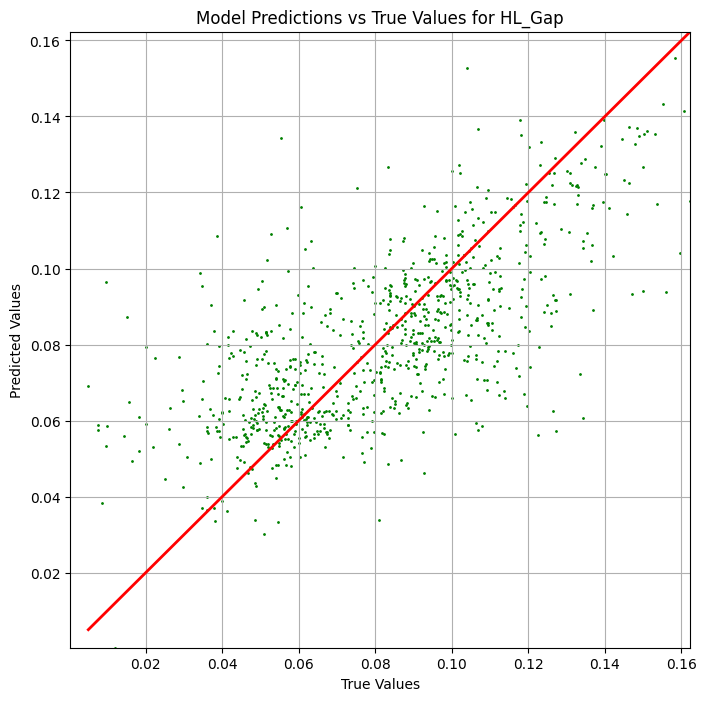

In [97]:
if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test, target_column=['Target'])


target_column = y_test.columns[0]

# Plot the scatter plot
plt.figure(figsize=(8, 8))
true_values = y_test[target_column]
predicted_values = predictions.flatten()
plt.scatter(true_values, predicted_values, s=1, color='green')
plt.title(f"Model Predictions vs True Values for {target_column}")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xlim([min(true_values.min(), predicted_values.min()), max(true_values.max(), predicted_values.max())])
plt.ylim([min(true_values.min(), predicted_values.min()), max(true_values.max(), predicted_values.max())])
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'r', lw=2)

plt.grid(True)
plt.show()

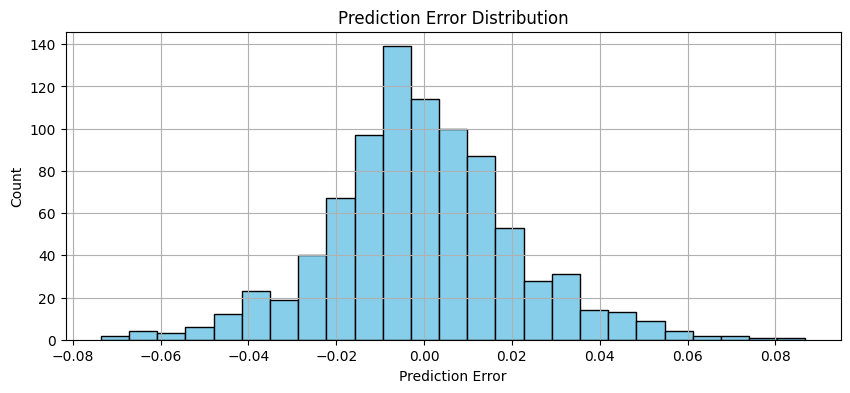

In [98]:
# error distribution.

# Calculate errors and plot histogram
plt.figure(figsize=(10, 4))

# Calculate the error
true_values = y_test.iloc[:, 0]
predicted_values = predictions.flatten()
errors = predicted_values - true_values

# Plotting the error distribution
plt.hist(errors, bins=25, color='skyblue', edgecolor='black')
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# XGboost

In [99]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Create the XGBoost regressor with eval_metric set during initialization
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric= "mae", random_state=42)

# Train the XGBoost model
xgb_model.fit(x_train, y_train,
              eval_set=[(x_train, y_train), (x_val, y_val)],
              verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:

# Evaluate the model on the training set
y_train_pred = xgb_model.predict(x_train)
xgb_train_mae = mean_absolute_error(y_train, y_train_pred)
xgb_train_mse = mean_squared_error(y_train, y_train_pred)
print(f"XGBoost Training MAE: {xgb_train_mae:.4f}")
print(f"XGBoost Training MSE: {xgb_train_mse:.4f}")

# Evaluate the model on the validation set
y_val_pred = xgb_model.predict(x_val)
xgb_val_mae = mean_absolute_error(y_val, y_val_pred)
xgb_val_mse = mean_squared_error(y_val, y_val_pred)
print(f"XGBoost Validation MAE: {xgb_val_mae:.4f}")
print(f"XGBoost Validation MSE: {xgb_val_mse:.4f}")

# Evaluate the model on the testing set
y_test_pred = xgb_model.predict(x_test)
xgb_test_mae = mean_absolute_error(y_test, y_test_pred)
xgb_test_mse = mean_squared_error(y_test, y_test_pred)
print(f"XGBoost Testing MAE: {xgb_test_mae:.4f}")
print(f"XGBoost Testing MSE: {xgb_test_mse:.4f}")

XGBoost Training MAE: 0.0091
XGBoost Training MSE: 0.0002
XGBoost Validation MAE: 0.0143
XGBoost Validation MSE: 0.0004
XGBoost Testing MAE: 0.0149
XGBoost Testing MSE: 0.0004


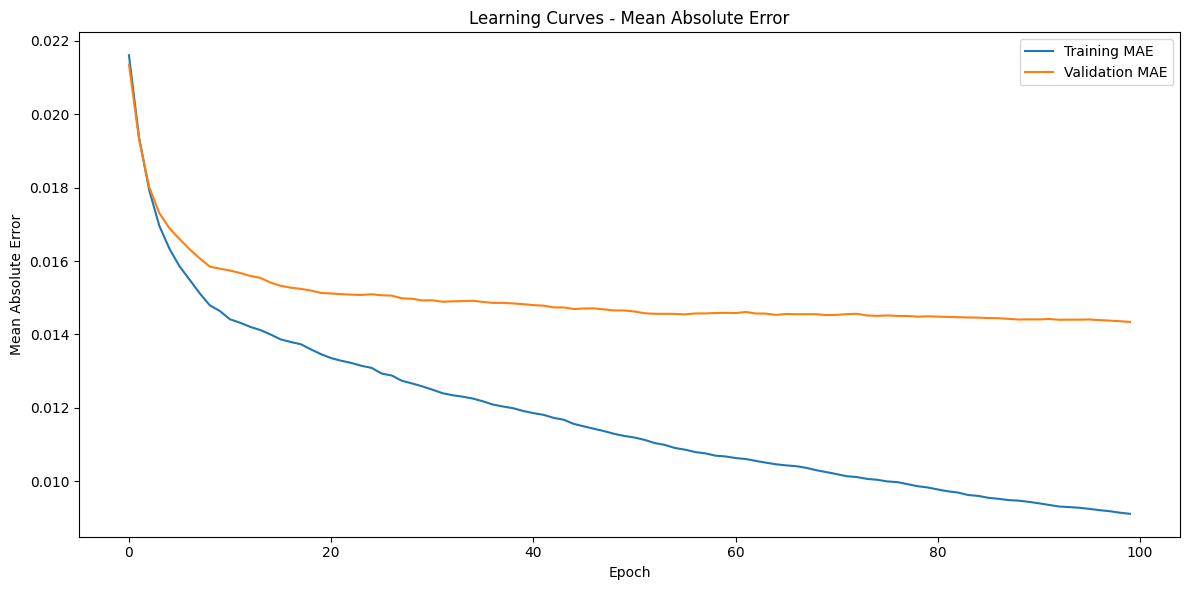

In [101]:
# After training, you can access the evaluation results like this:
training_mae = xgb_model.evals_result()['validation_0']['mae']
validation_mae = xgb_model.evals_result()['validation_1']['mae']

# Now you can plot the MAE for training and validation sets
plt.figure(figsize=(12, 6))
plt.plot(training_mae, label='Training MAE')
plt.plot(validation_mae, label='Validation MAE')
plt.title('Learning Curves - Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [102]:
results_df = pd.DataFrame({'true_target': y_test.values.flatten(), 'prediction': y_test_pred.flatten()})
results_df.head()

,true_target,prediction
0,0.05343,0.055993
1,0.13136,0.114669
2,0.10822,0.085543
3,0.08269,0.083564
4,0.06219,0.076581
